In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import qutip as qtp
from matplotlib import cm
pd.set_option('display.precision', 3)
import matplotlib

In [26]:
print(matplotlib.__version__)

3.7.0


In [3]:
data = pd.read_csv('HH_VV_IR_CG.csv',header= None).to_numpy()

print(data)


[[ 0.30497016  0.01759421 -0.15614918  0.42251323]
 [ 0.01759421  0.07279468 -0.09964311 -0.13550963]
 [-0.15614918 -0.09964311  0.17449774 -0.09310503]
 [ 0.42251323 -0.13550963 -0.09310503  0.44773742]]


In [4]:
## Basis definition & basic matrices 

#Row vectors, i.e. bras,
H = np.array([[1,0]]) # <H|
V = np.array([[0,1]]) # <V|

HH = np.kron(H.T,H) #|H><H|
VV = np.kron(V.T,V) #|V><V|
HV = np.kron(H.T,V) #|H><V|
VH = np.kron(V.T,H) #|V><H|

Id = HH+VV

sigma1 = HV+ VH

sigma2 = 1j*(VH-HV)

sigma3 = (HH-VV)

sigma2_2 = np.kron(sigma2,sigma2)

In [5]:
sigma2_2

array([[ 0.+0.j,  0.-0.j,  0.-0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.-0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.-0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

In [6]:
np.kron(np.kron(H,H).T,np.kron(V,V))

array([[0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [7]:
def fancy_densityMatrixPlot(rho):
    rhoLabels = ["HH", "HV",  "VH", "VV"]


    fig = plt.figure(figsize=(10, 4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')




#     p =qtp.visualization.hinton(rho,xlabels = rhoLabels, ylabels = rhoLabels,\
#                                 title = r"Re($\rho$), Top view ", cmap = cm.RdBu_r, ax = ax1)
    
    p =qtp.visualization.hinton(rho, cmap = cm.RdBu_r, ax = ax1)
    ax1.set_title('Top View')
    ax1.annotate('     HH          HV          VH          VV',(-0.1,-0.2))




    _x = np.arange(4)
    _y = np.arange(4)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    # top = np.real(rho.full()).ravel()
    top = np.real(rho).ravel()
    bottom = np.zeros_like(top)
    width = depth = 0.8

    # colors = plt.cm.RdBu_r(top/float(top.max()))
    # colors = plt.cm.RdBu_r(top/float(top.max()-0.1)+0.5)

    colors = plt.cm.RdBu_r((top/float(top.max()+0.1))*0.5+0.5)


    # print(top)
    # print(top/float(top.max()))
    # print(colors)
    alphas = np.power(abs(top)/float(top.max()),1)
    # alphas = abs(top)/float(top.max())
    # print(alphas)
    # p= ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color=colors)

    for k in [ax2.xaxis,ax2.yaxis,ax2.zaxis]:
        k.set_pane_color((1.0, 1.0, 1.0, 0.0))
        k._axinfo["grid"]['color'] =  (1,1,1,0)

    ax2.set_xticks(np.array([0,1,2,3])+0.5)
    ax2.set_xticklabels(['HH','HV','VH','VV'])
    ax2.set_yticks(np.array([0,1,2,3])+0.5)
    ax2.set_yticklabels(['HH','HV','VH','VV'])

    # ax1.set_zticks(np.array([-1,-0.5,0,0.5,1]))
    # ax1.set_zlim([-0.8,0.8])

    for i in range(len(x)):
    #     print(alphas[i])
        ax2.bar3d(x[i],y[i],bottom[i], width, depth, top[i], alpha=1, color=colors[i], shade = False)
        ax2.bar3d(x[i],y[i],bottom[i], width, depth, top[i], alpha=0.2, color=colors[i], edgecolor = colors[i], linewidth = 1)

    # plt.show()


    ax2.set_title('Metropolis plot')
    # fig.colorbar(p, ax=ax1)
    ax2.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax2.view_init(25, 15)
    plt.gcf().set_dpi(300)
    plt.show()

In [8]:
def calc_VnE(rhoe):
    value = 0
    for i in rhoe:
        if i>0:
            value += i*np.log(i)
    return -1*value

In [9]:
## Defining density matrices

phiplus = 0.5*np.array([[1,0,0,1],[0,0,0,0],[0,0,0,0],[1,0,0,1]])
phiminus = 0.5*np.array([[1,0,0,-1],[0,0,0,0],[0,0,0,0],[-1,0,0,1]])
psiplus = 0.5*np.array([[0,0,0,0],[0,1,1,0],[0,1,1,0],[0,0,0,0]])
psiminus = 0.5*np.array([[0,0,0,0],[0,1,-1,0],[0,-1,1,0],[0,0,0,0]])

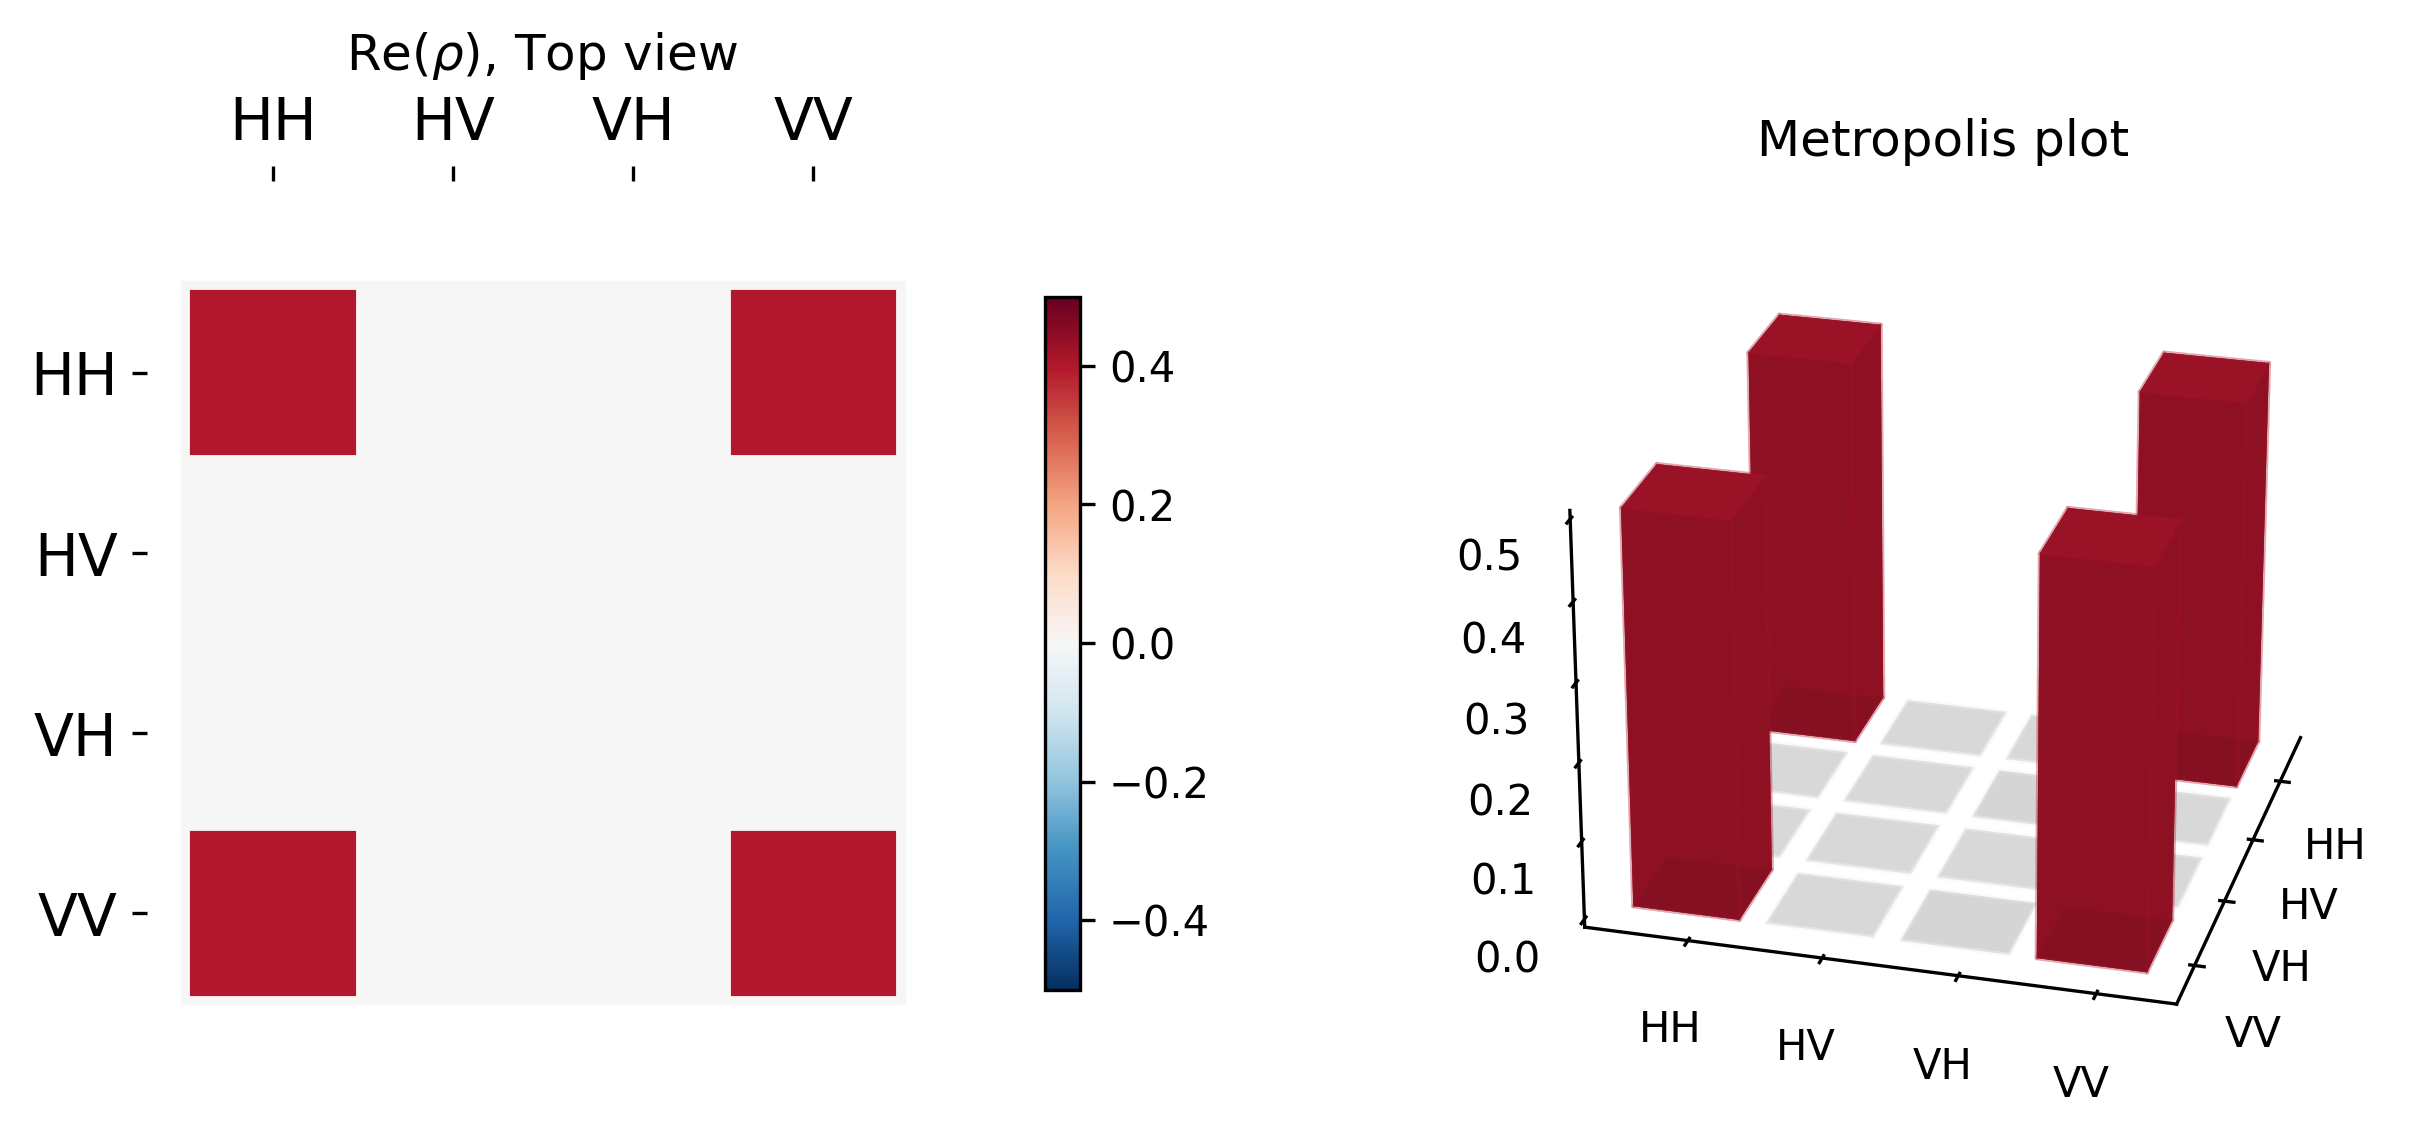

The eigenvalues of this density matrix are 0.000, 0.000, 0.000 and 1.000
The calculated Von Neuman Entropy is -0.000


In [12]:
# Example 1 

rho = phiplus
fancy_densityMatrixPlot(rho)
vals, vects = np.linalg.eigh(rho)

print("The eigenvalues of this density matrix are %0.3f, %0.3f, %0.3f and %0.3f"%(*vals,))

print("The calculated Von Neuman Entropy is %0.3f"%(calc_VnE(vals)))




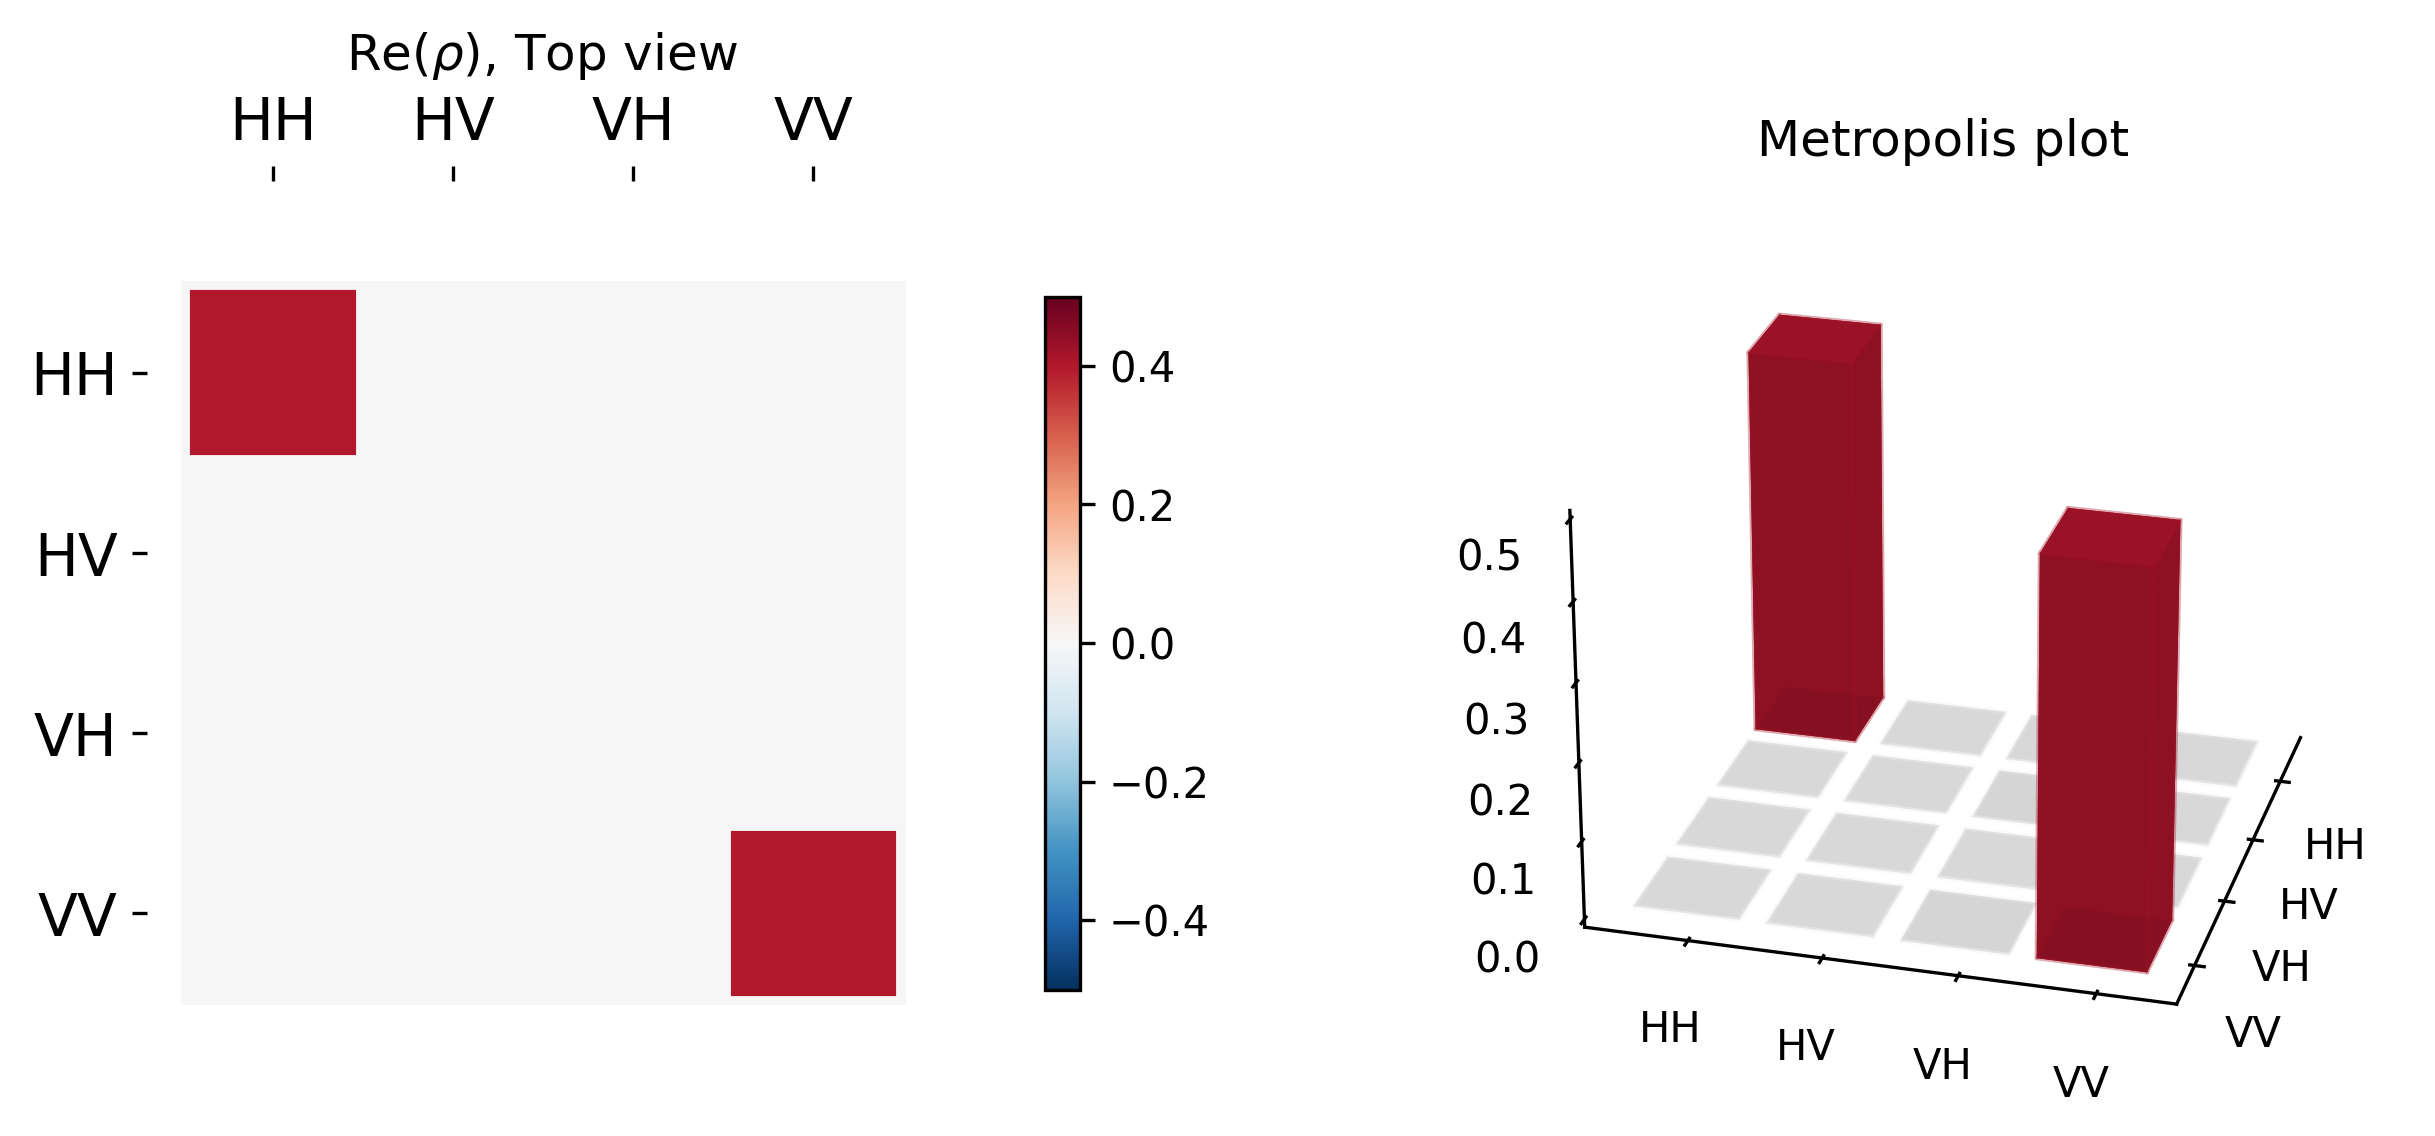

The eigenvalues of this density matrix are 0.000, 0.000, 0.500 and 0.500
The calculated Von Neuman Entropy is 0.693


In [13]:
# Example 2 

rho_hh = np.kron(np.kron(H,H).T,np.kron(H,H))
rho_vv = np.kron(np.kron(V,V).T,np.kron(V,V))

rho_mixed = 0.5*(rho_hh+rho_vv)

rho = rho_mixed
fancy_densityMatrixPlot(rho)
vals, vects = np.linalg.eigh(rho)

print("The eigenvalues of this density matrix are %0.3f, %0.3f, %0.3f and %0.3f"%(*vals,))

print("The calculated Von Neuman Entropy is %0.3f"%(calc_VnE(vals)))



The original matrix is


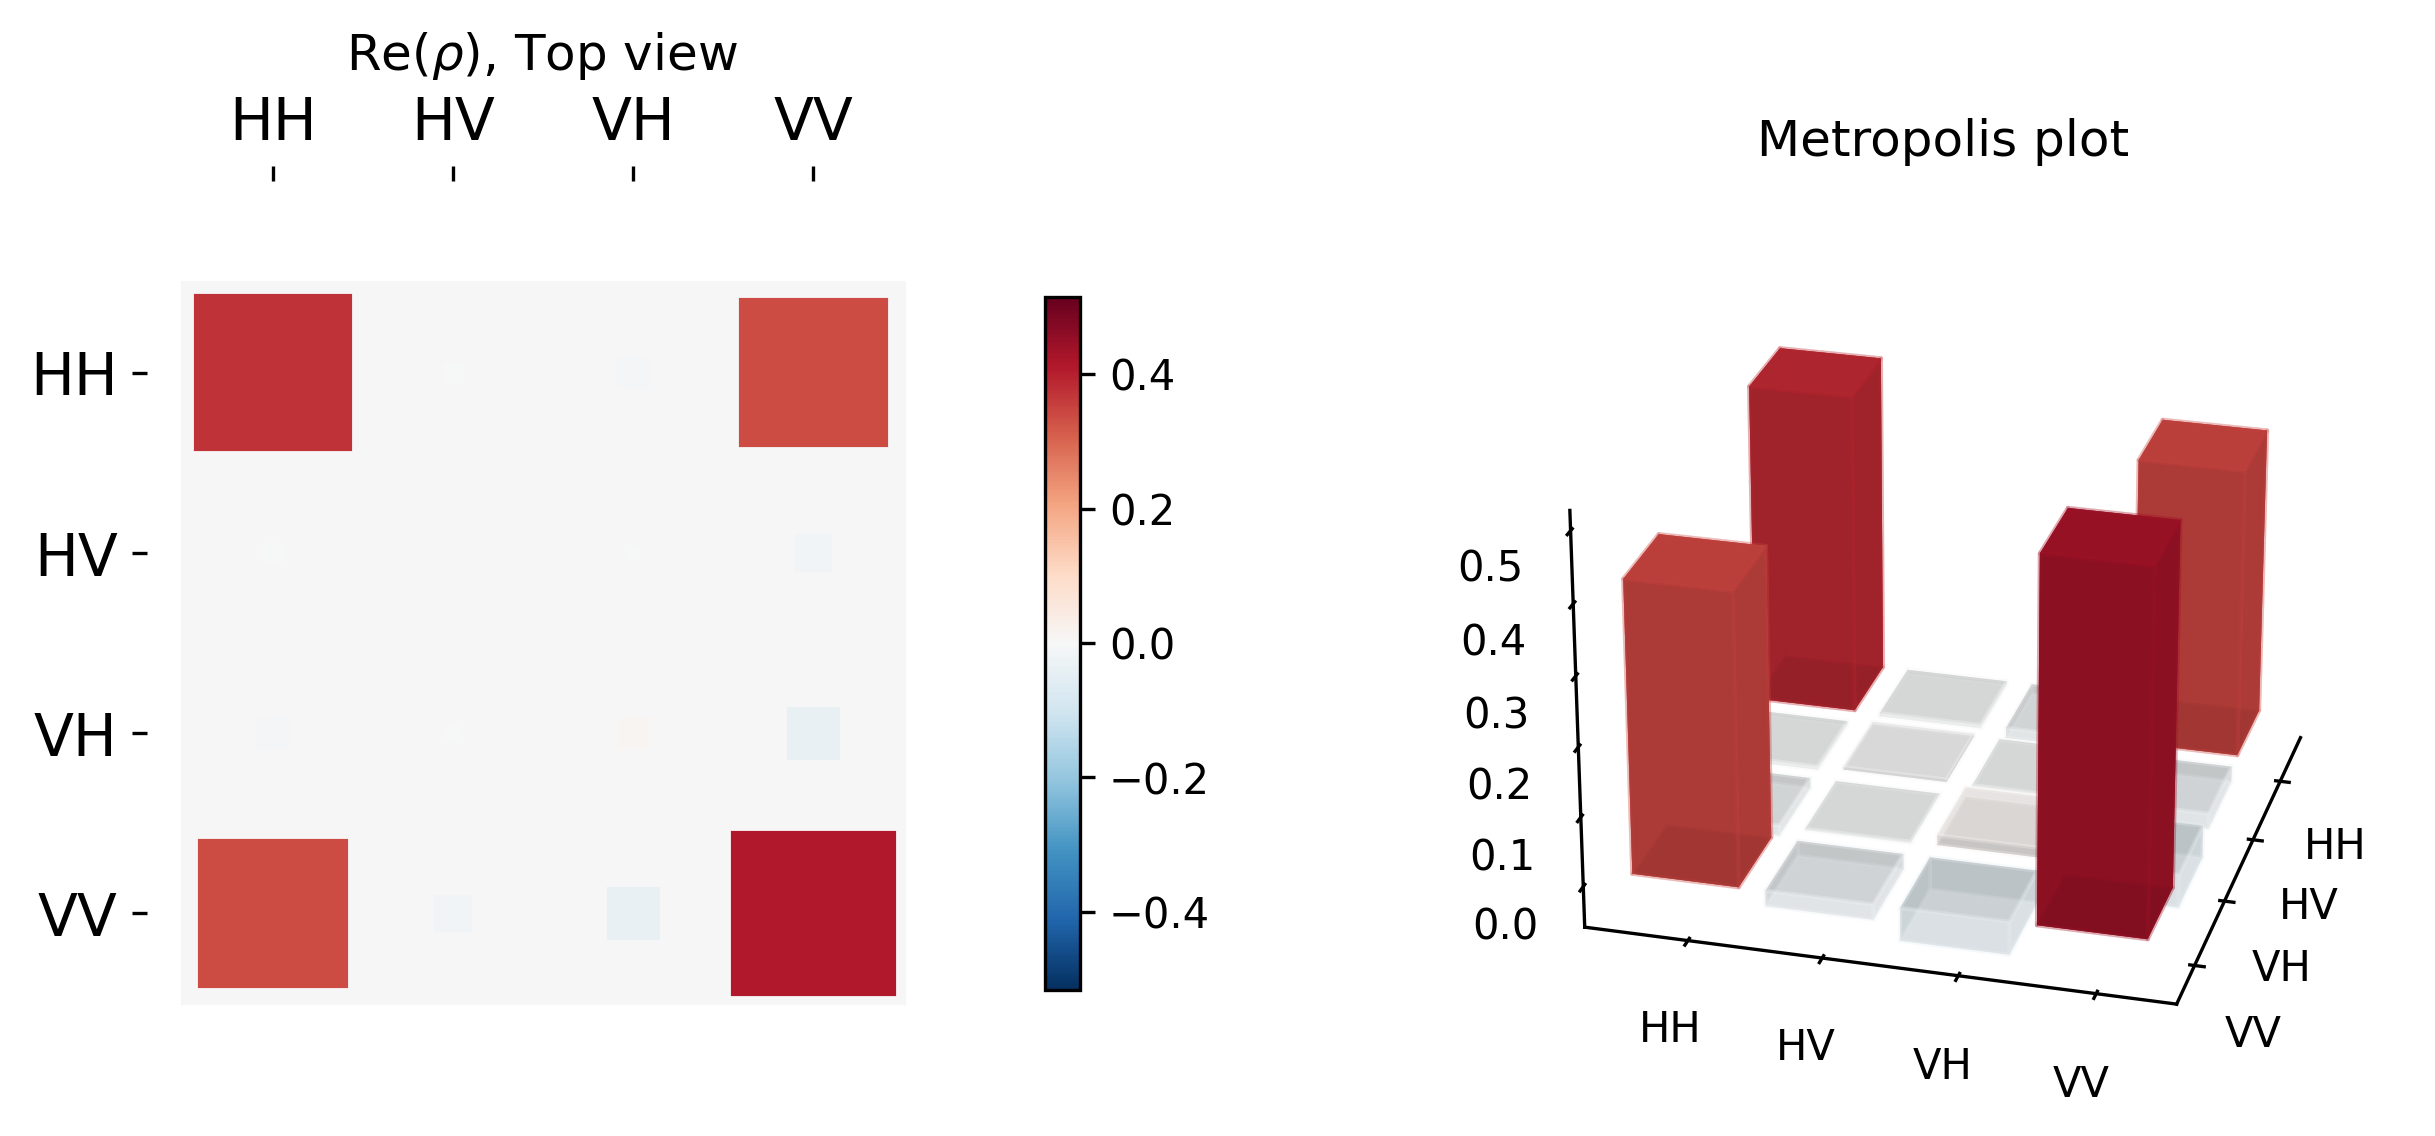

The fidelity with state phi+ is 90.936 %
The fidelity with state phi- is 7.288 %
The fidelity with state psi+ is 0.691 %
The fidelity with state psi- is 1.085 %
The original eigenvalues are -0.003, 0.010, 0.081 and 0.913
The original calculated Von Neuman Entropy is 0.332
The corrected eigenvalues are 0.000, 0.009, 0.079 and 0.912
The original calculated Von Neuman Entropy is 0.327
The adjusted matrix is
[[ 4.65568341e-01 -5.30894720e-03 -1.54082327e-02  4.18074095e-01]
 [-5.30894720e-03  5.07577160e-03 -1.40511152e-04 -2.14549097e-02]
 [-1.54082327e-02 -1.40511152e-04  1.44544969e-02 -4.69746149e-02]
 [ 4.18074095e-01 -2.14549097e-02 -4.69746149e-02  5.14901391e-01]]


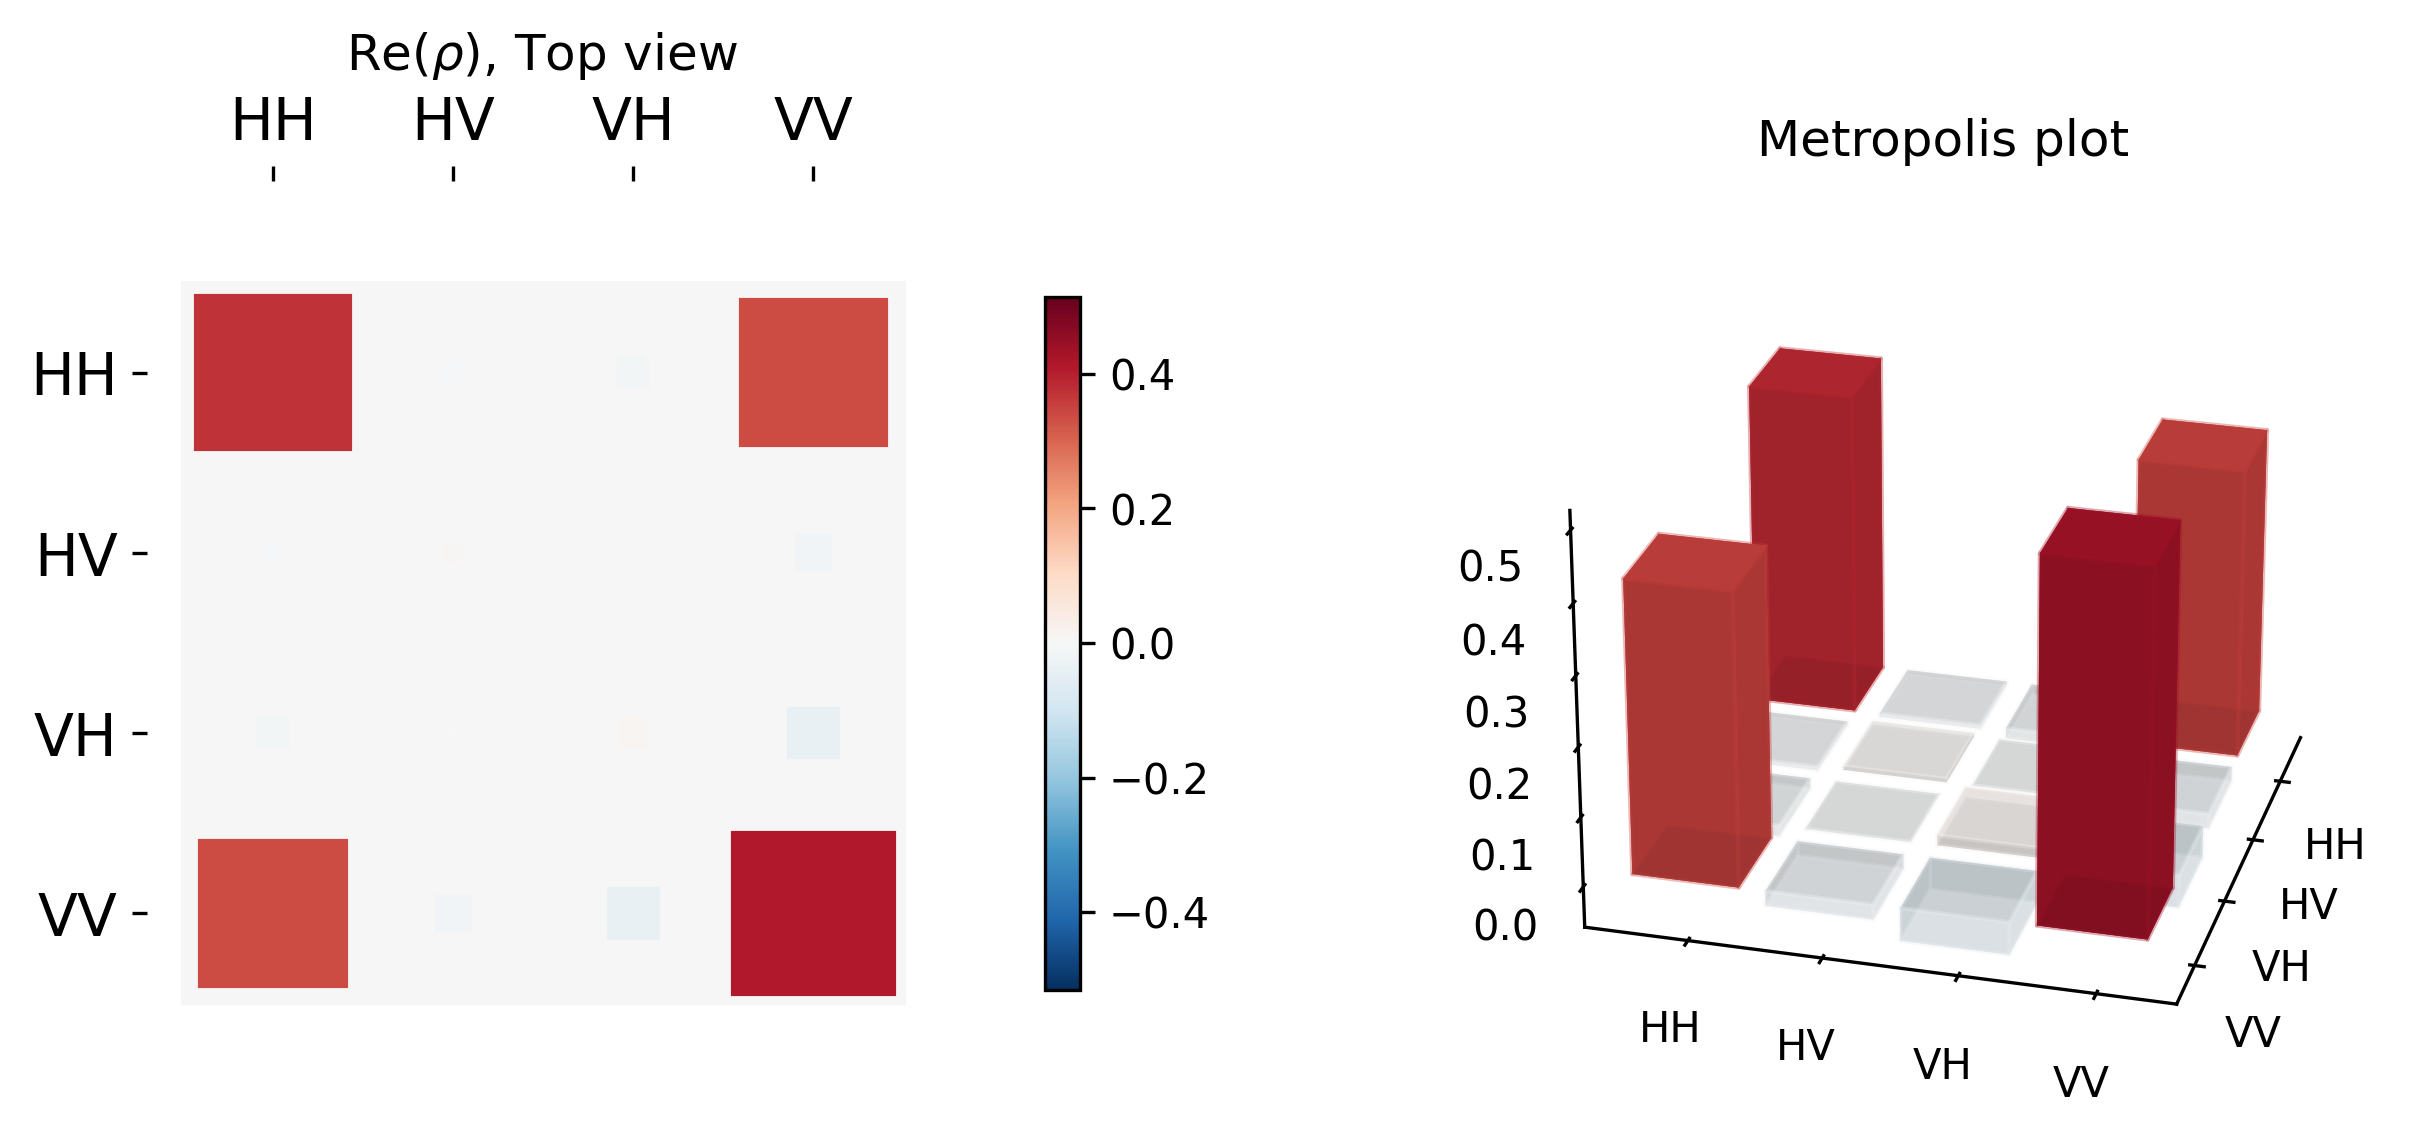

The new fidelity with state phi+ is 90.831 %
The new fidelity with state phi- is 7.216 %
The new fidelity with state psi+ is 0.962 %
The new fidelity with state psi- is 0.991 %


In [14]:
## Density Matrices correction

print('The original matrix is')
rho = pd.read_csv('hhvv_mm.csv',header= None).to_numpy()

# rho = np.array([[0.36,-4.26e-3,-1.93e-2,0.33],\
#                     [-4.26e-3,-2.69e-4,-2.49e-2,1.25e-2],\
#                     [-1.93e-3,-2.49e-2,1.78e-2,-1.52e-2],\
#                     [0.33,1.25e-2,-1.52e-2,6.23e-1]])

fancy_densityMatrixPlot(rho)


# Calculate fidelities
f1 = np.trace(np.matmul(rho,phiplus))
f2 = np.trace(np.matmul(rho,phiminus))
f3 = np.trace(np.matmul(rho,psiplus))
f4 = np.trace(np.matmul(rho,psiminus))

# print(f0)
print(r"The fidelity with state phi+ is %0.3f "%(f1*100)+u"\u0025")
print(r"The fidelity with state phi- is %0.3f "%(f2*100)+u"\u0025")
print(r"The fidelity with state psi+ is %0.3f "%(f3*100)+u"\u0025")
print(r"The fidelity with state psi- is %0.3f "%(f4*100)+u"\u0025")

vals, vects = np.linalg.eigh(rho)


# print("The original eigenvalues are %0.3f, %0.3f, %0.3f and %0.3f"%(vals[0],vals[1],vals[2],vals[3]))
print("The original eigenvalues are %0.3f, %0.3f, %0.3f and %0.3f"%(*vals,))
print("The original calculated Von Neuman Entropy is %0.3f"%(calc_VnE(vals)))



# Correcting eigenvalues, per https://arxiv.org/pdf/1106.5458.pdf

a = 0
j = len(vals)

neweigenvals = np.zeros(j)

for i in range(j):
    v_t = vals[i]+a/(j)
    if v_t>0:
        neweigenvals[i] = v_t
    else:
        neweigenvals[i] = 0
        a += vals[i]
        j -= 1

# print("The corrected eigenvalues are %0.3f, %0.3f, %0.3f and %0.3f"%(neweigenvals[0],neweigenvals[1],neweigenvals[2],neweigenvals[3]))
print("The corrected eigenvalues are %0.3f, %0.3f, %0.3f and %0.3f"%(*neweigenvals,))
print("The original calculated Von Neuman Entropy is %0.3f"%(calc_VnE(neweigenvals)))        
# print(neweigenvals)

    
new_mat = np.dot(vects, neweigenvals[:,np.newaxis] * vects.T)    

print('The adjusted matrix is')
print(new_mat)


fancy_densityMatrixPlot(new_mat)



# Calculate fidelities
f1n = np.trace(np.matmul(new_mat,phiplus))
f2n = np.trace(np.matmul(new_mat,phiminus))
f3n = np.trace(np.matmul(new_mat,psiplus))
f4n = np.trace(np.matmul(new_mat,psiminus))

# print(f0)
print(r"The new fidelity with state phi+ is %0.3f "%(f1n*100)+u"\u0025")
print(r"The new fidelity with state phi- is %0.3f "%(f2n*100)+u"\u0025")
print(r"The new fidelity with state psi+ is %0.3f "%(f3n*100)+u"\u0025")
print(r"The new fidelity with state psi- is %0.3f "%(f4n*100)+u"\u0025")


In [15]:
# print(H)

In [16]:
# np.kron(np.kron(V,V).T,np.kron(V,V))

In [17]:
# sigma2_2

In [18]:


# Partial trace of the first qubit
def partialTrace1(rho):
    
    #<H1|rho|H1> 
    # = (Id cross <H|) rho (Id cross |H>)
    H1 = np.kron(Id,H).dot(rho).dot(np.kron(Id,H.T))
    
    #<V1|rho|V1> 
    # = (Id cross <V|) rho (Id cross |V>)
    V1 = np.kron(Id,V).dot(rho).dot(np.kron(Id,V.T))
    return H1+V1

# Partial trace of the second qubit
def partialTrace2(rho):
    
    #<H2|rho|H2> 
    # = (<H| cross Id) rho (|H> cross Id)
    H2 = np.kron(H,Id).dot(rho).dot(np.kron(H.T,Id))
    
    #<V2|rho|V2> 
    # = (<V| cross Id) rho (|V> cross Id)
    V2 = np.kron(V,Id).dot(rho).dot(np.kron(V.T,Id))
    return H2+V2



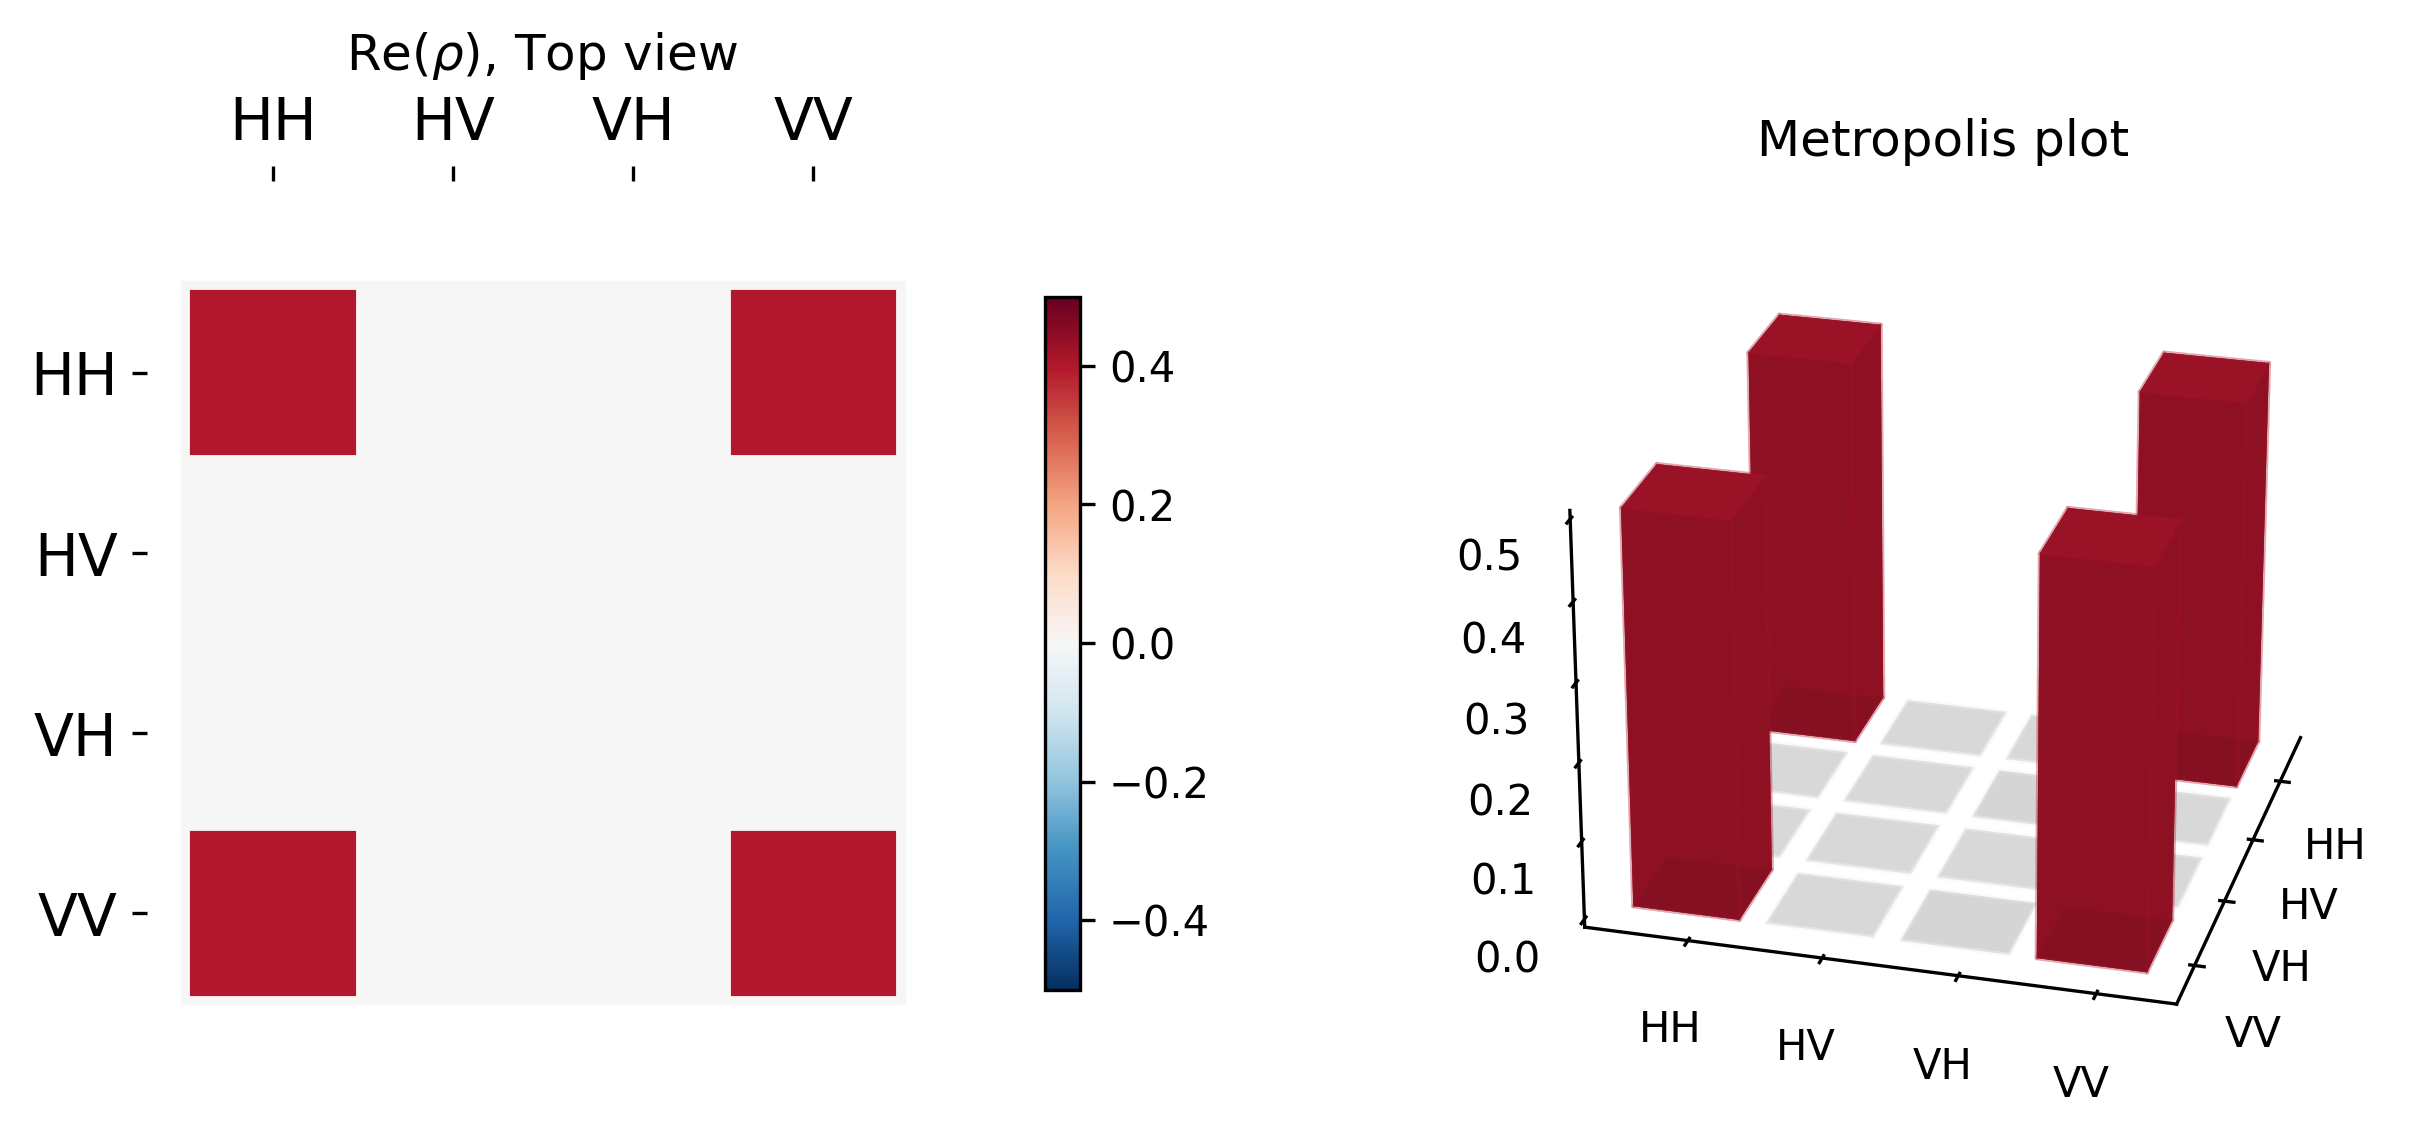

Partial trace with respect to first qubit
[[0.5 0. ]
 [0.  0.5]]
Partial trace with respect to second qubit
[[0.5 0. ]
 [0.  0.5]]


In [19]:
# Example 1 

rho = phiplus

fancy_densityMatrixPlot(rho)
print("Partial trace with respect to first qubit")
print(partialTrace1(rho))

print("Partial trace with respect to second qubit")
print(partialTrace2(rho))

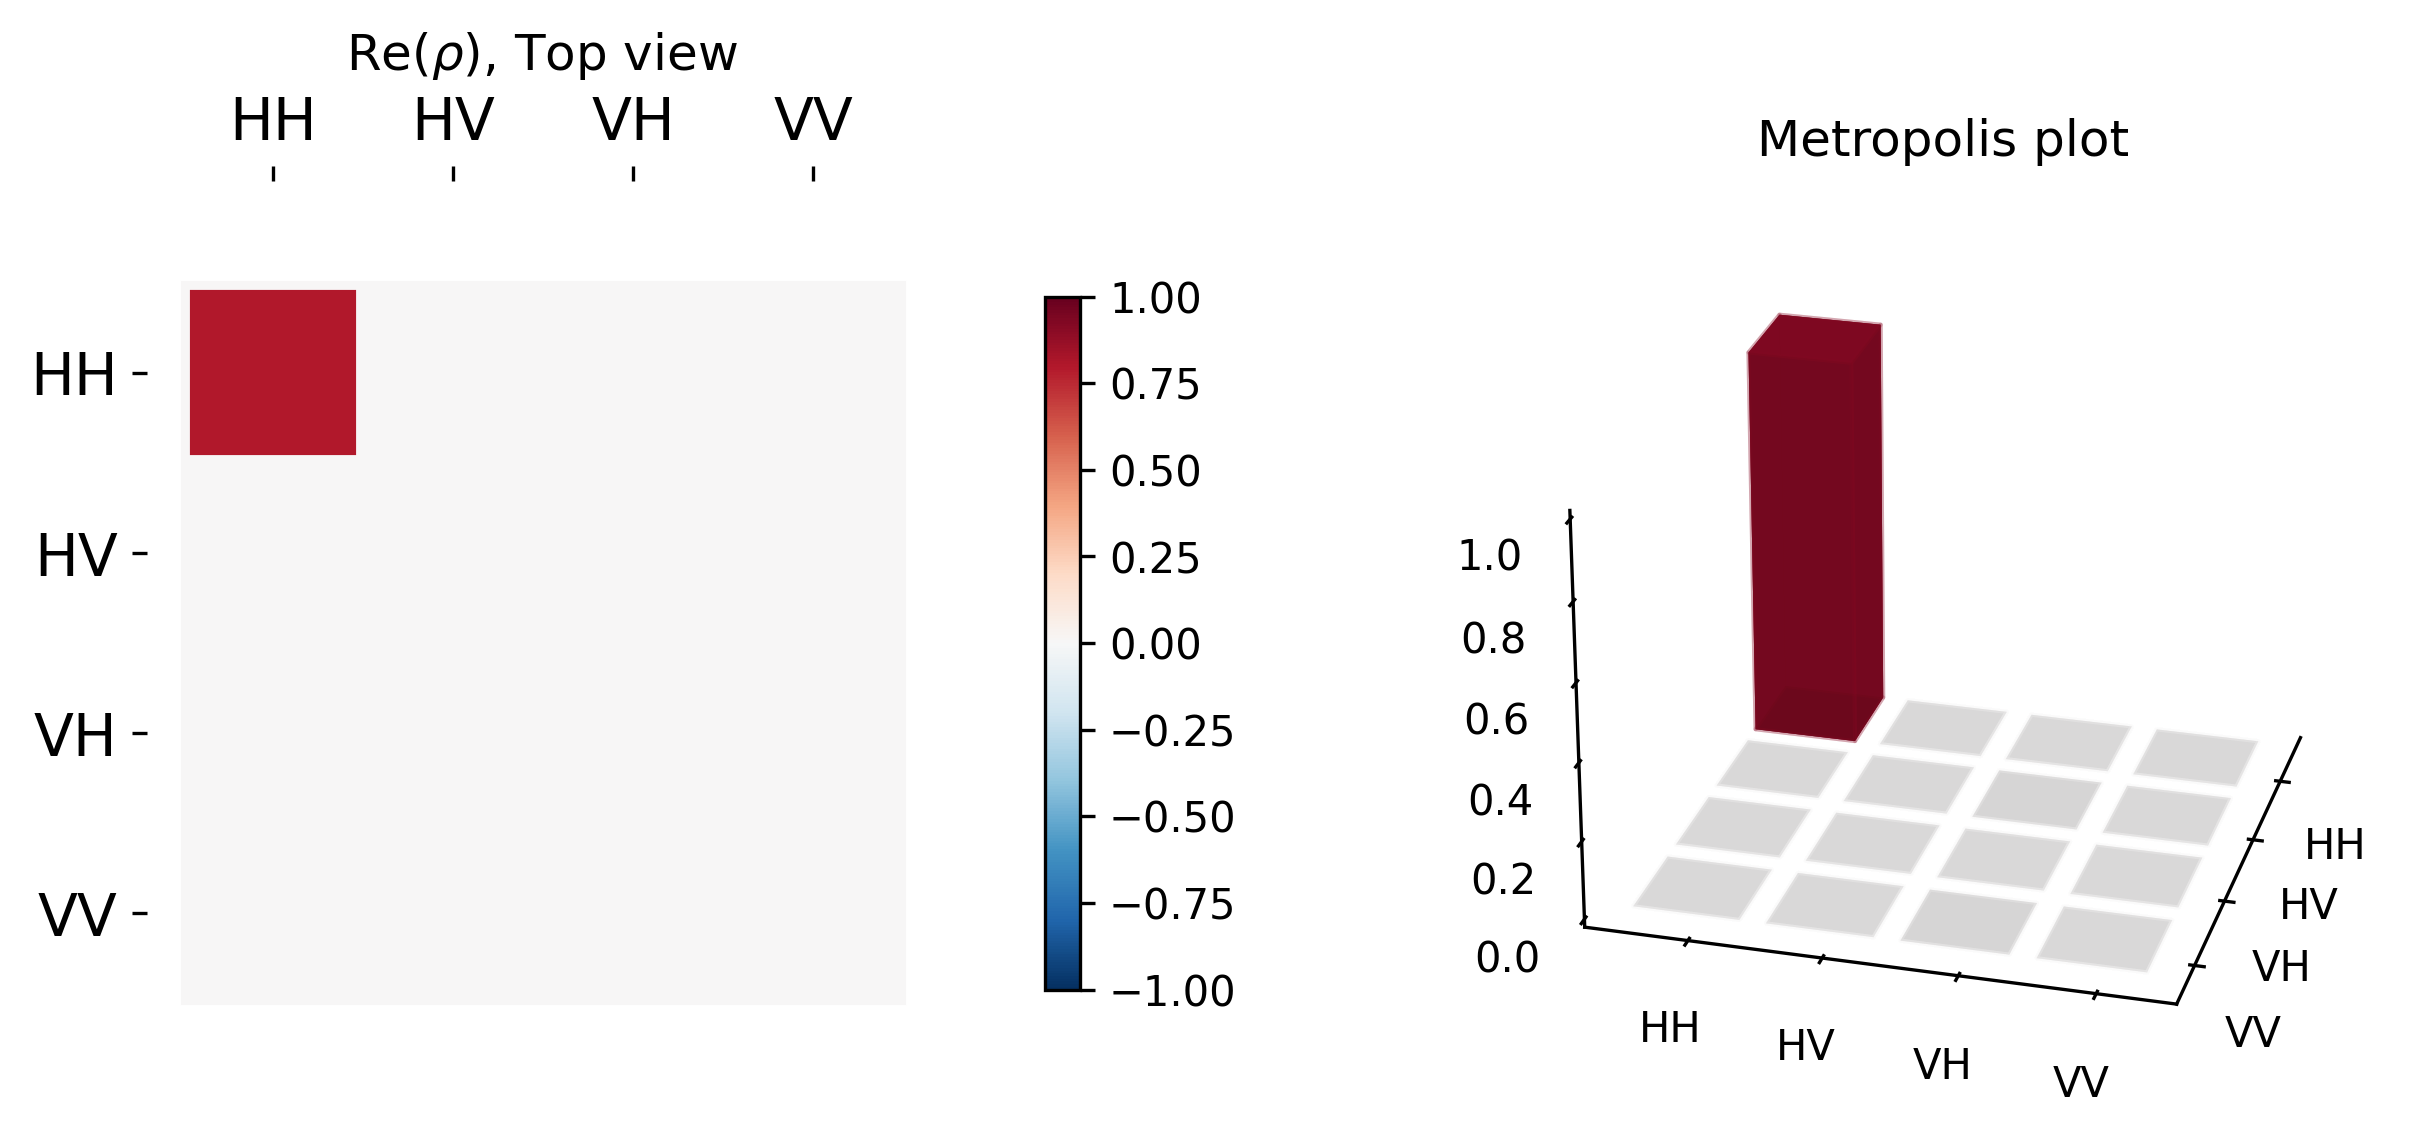

Partial trace with respect to first qubit
[[1 0]
 [0 0]]
Partial trace with respect to second qubit
[[1 0]
 [0 0]]


In [20]:
# Example 2

rho = rho_hh

fancy_densityMatrixPlot(rho)
print("Partial trace with respect to first qubit")
print(partialTrace1(rho))

print("Partial trace with respect to second qubit")
print(partialTrace2(rho))

In [21]:
## Checking if a state is entangled!

s1 = 1/np.sqrt(2)*np.array([1,0,0,1]) # This would be the symmetric Bell state 
s2 = np.array([1,0,0,0])
s3 = 1/np.sqrt(2)*np.array([1,0,0,1j])
s4 = 1/np.sqrt(4)*np.array([1,1,1,1])
s5 = np.array([np.sqrt(0.55),0,0,np.sqrt(0.45)])

In [22]:


# Method 1 (only works for pure states!)
# https://quantumcomputing.stackexchange.com/questions/2284/how-to-check-if-2-qubits-are-entangled/2287#2287
# see also https://www.physics.umd.edu/grt/taj/623f/QInfo.pdf

# General state
# a|00> + b|01> + c|10> + d|11> where {a,b,c,d} are complex numbers

def checkEntanglement_1(S):
    ans = True
#     print(S[0]*S[3]-S[1]*S[2])
    if S[0]*S[3]-S[1]*S[2]==0:
        ans = False
    return ans

print('Test 1: ad-bc')
print('state 1 is '+('' if checkEntanglement_1(s1) else 'not ') +'entangled')
print('state 2 is '+('' if checkEntanglement_1(s2) else 'not ') +'entangled')
print('state 3 is '+('' if checkEntanglement_1(s3) else 'not ') +'entangled')
print('state 4 is '+('' if checkEntanglement_1(s4) else 'not ') +'entangled')
print('state 5 is '+('' if checkEntanglement_1(s5) else 'not ') +'entangled')




Test 1: ad-bc
state 1 is entangled
state 2 is not entangled
state 3 is entangled
state 4 is not entangled
state 5 is entangled


In [23]:
# Method 2 (only works for pure states!)
# Check https://quantumcomputing.stackexchange.com/questions/2263/how-do-i-show-that-a-two-qubit-state-is-an-entangled-state


# Calculating density matrices 
rho1 = np.outer(s1,np.conj(s1))
rho2 = np.outer(s2,np.conj(s2))
rho3 = np.outer(s3,np.conj(s3))
rho4 = np.outer(s4,np.conj(s4))
rho5 = np.outer(s5,np.conj(s5))

def checkEntanglement_2(S):
    
    rhos = np.outer(S,S)
    
    rho1 = partialTrace1(rhos)
    
    ans = False
    
    if np.trace(rho1.dot(rho1)) != 1:
        ans = True
        
    return ans

print('Test 2: partial trace')
print('state 1 is '+('' if checkEntanglement_2(s1) else 'not ') +'entangled')
print('state 2 is '+('' if checkEntanglement_2(s2) else 'not ') +'entangled')
print('state 3 is '+('' if checkEntanglement_2(s3) else 'not ') +'entangled')
print('state 4 is '+('' if checkEntanglement_2(s4) else 'not ') +'entangled')
print('state 5 is '+('' if checkEntanglement_2(s5) else 'not ') +'entangled')


Test 2: partial trace
state 1 is entangled
state 2 is not entangled
state 3 is entangled
state 4 is not entangled
state 5 is entangled


In [24]:
## concurrence and tangle calculations

# see https://arxiv.org/pdf/quant-ph/9907047.pdf
# and https://arxiv.org/pdf/quant-ph/9709029.pdf


def entanglement_of_formation(tau):
    tau_ = 0.5 + 0.5*np.sqrt(1-tau)
    tau_r = 1 - tau_ 
    if tau_ ==0:
        e1 = 0
    else:
        e1 = -tau_*np.log2(tau_)
        
    if tau_r ==0:
        e2 = 0
    else:
        e2 = -tau_r*np.log2(tau_r)   
        
    return e1+e2

def calcs_tangle_fromKet(S):
    
    rho = np.outer(S,np.conj(S))
#     sigma2_2 = np.kron(sigma2_sigma2)
    rhotilde = sigma2_2.dot(np.conj(rho)).dot(sigma2_2)
    
    mat = rho.dot(rhotilde)
    vals, vects = np.linalg.eigh(mat)
#    
    vals = vals[::-1]
    print("The original eigenvalues are %0.3f, %0.3f, %0.3f and %0.3f"%(*vals,))


    concurrence = np.max([vals.dot(np.array([1,-1,-1,-1])),0])
    print("The concurrence is %0.5f"%concurrence)
    tangle = concurrence**2
#     print("The tangle is %0.5f"%tangle)

    # simplified formula for fidelity. Tangle is the fidelity between the state and its spin-flipped state!
    c2 = np.real(np.trace(mat))
    print("The tangle2 is %0.5f"%tangle)
    entanglement = entanglement_of_formation(concurrence)
    print("The entanglement of formation is %0.5f"%entanglement)
    
    return concurrence,tangle,entanglement
    

def calcs_tangle_fromRho(rho):
    
#     rho = np.outer(S,np.conj(S))
#     sigma2_2 = np.kron(sigma2_sigma2)
    rhotilde = sigma2_2.dot(np.conj(rho)).dot(sigma2_2)
    
    mat = rho.dot(rhotilde)
    vals, vects = np.linalg.eigh(mat)
#    
    vals = vals[::-1]
    print("The original eigenvalues are %0.3f, %0.3f, %0.3f and %0.3f"%(*vals,))


    concurrence = np.max([vals.dot(np.array([1,-1,-1,-1])),0])
    print("The concurrence is %0.5f"%concurrence)
    tangle = concurrence**2
#     print("The tangle is %0.5f"%tangle)

    # simplified formula for fidelity. Tangle is the fidelity between the state and its spin-flipped state!
    c2 = np.real(np.trace(mat))
    print("The tangle2 is %0.5f"%tangle)
    entanglement = entanglement_of_formation(concurrence)
    print("The entanglement of formation is %0.5f"%entanglement)
    
    return concurrence,tangle,entanglement
        

In [33]:
calcs_tangle_fromKet(s1)

The original eigenvalues are 1.000, 0.000, 0.000 and 0.000
The concurrence is 1.00000
The tangle2 is 1.00000
The entanglement of formation is 1.00000


(0.9999999999999996, 0.9999999999999991, 0.9999999999999997)

In [36]:
calcs_tangle_fromRho(phiplus)

The original eigenvalues are 1.000, 0.000, 0.000 and 0.000
The concurrence is 1.00000
The tangle2 is 1.00000
The entanglement of formation is 1.00000


(1.0, 1.0, 1.0)

In [37]:
calcs_tangle_fromRho(rho_mixed)

The original eigenvalues are 0.250, 0.250, 0.000 and 0.000
The concurrence is 0.00000
The tangle2 is 0.00000
The entanglement of formation is 0.00000


(0.0, 0.0, 0.0)